In [1]:
import os 
os.getcwd()
# by help of this command, we can find the current directory of your system which it makes it easy for us, so that we can save the file accordingly which we want to read.

'C:\\Users\\HP\\OneDrive\\Desktop\\GRATELAKES\\Project\\Module 3'

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline

In [7]:
from warnings import filterwarnings         # This is mainly used to avoid the unnecessary warnings which come while running the code due to the changes in the python liabrary 
filterwarnings("ignore")

In [8]:
df=pd.read_csv('SalaryData.csv')

In [9]:
df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [10]:
df.shape

(40, 3)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [37]:
df.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

In [23]:
df['Education']= pd.Categorical(df['Education'])
df['Occupation']= pd.Categorical(df['Occupation'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Education   40 non-null     category
 1   Occupation  40 non-null     category
 2   Salary      40 non-null     int64   
dtypes: category(2), int64(1)
memory usage: 864.0 bytes


In [12]:
df.describe(include='all')

,Education,Occupation,Salary
count,40,40,40.000000
unique,3,4,NaN
top,Doctorate,Prof-specialty,NaN
freq,16,13,NaN
mean,NaN,NaN,162186.875000
std,NaN,NaN,64860.407506
min,NaN,NaN,50103.000000
25%,NaN,NaN,99897.500000
50%,NaN,NaN,169100.000000
75%,NaN,NaN,214440.750000


In [14]:
df.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

## 1.2 Perform one-way ANOVA for Education with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [15]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


<AxesSubplot:xlabel='Education', ylabel='Salary'>

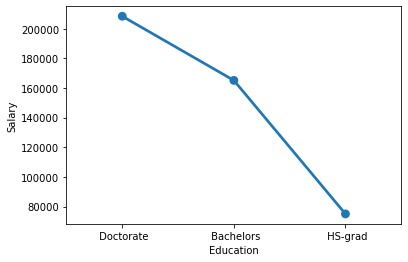

In [16]:
sns.pointplot(x='Education', y='Salary', data=df, ci=None)

## 1.3 Perform one-way ANOVA for variable Occupation with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [17]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

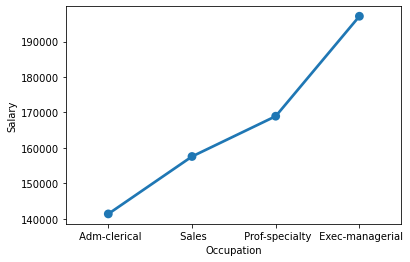

In [18]:
sns.pointplot(x='Occupation', y='Salary', data=df, ci=None)

## 1.4 If the null hypothesis is rejected in either (1.2) or in (1.3), find out which class means are significantly different. Interpret the result.

In [35]:
df_1 = pairwise_tukeyhsd(endog=df['Salary'], groups=df['Occupation'], alpha=0.05)
print(df_1)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1           group2        meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------------------------
    Adm-clerical  Exec-managerial     55693.3 0.4146  -40415.1459 151801.7459  False
    Adm-clerical   Prof-specialty  27528.8538 0.7252  -46277.4011 101335.1088  False
    Adm-clerical            Sales  16180.1167    0.9  -58951.3115  91311.5449  False
 Exec-managerial   Prof-specialty -28164.4462 0.8263 -120502.4542  64173.5618  False
 Exec-managerial            Sales -39513.1833 0.6507 -132913.8041  53887.4374  False
  Prof-specialty            Sales -11348.7372    0.9  -81592.6398  58895.1655  False
------------------------------------------------------------------------------------


In [36]:
df_1 = pairwise_tukeyhsd(endog=df['Salary'], groups=df['Education'], alpha=0.05)
print(df_1)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


## 1.5 What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

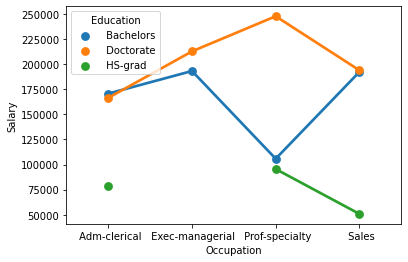

In [27]:
sns.pointplot(x='Occupation', y='Salary', data=df, hue='Education',ci=None);

## 1.6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?

In [21]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,72.211958,5.466264e-12
C(Occupation),3.0,5.519946e+09,1.839982e+09,2.587626,7.211580e-02
C(Education):C(Occupation),6.0,3.634909e+10,6.058182e+09,8.519815,2.232500e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN
